Task 1

In [2]:
import torch
import numpy as np

print("PyTorch Version:", torch.__version__)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import matplotlib.pyplot as plt

PyTorch Version: 2.7.1+cu126


Tutorial Example

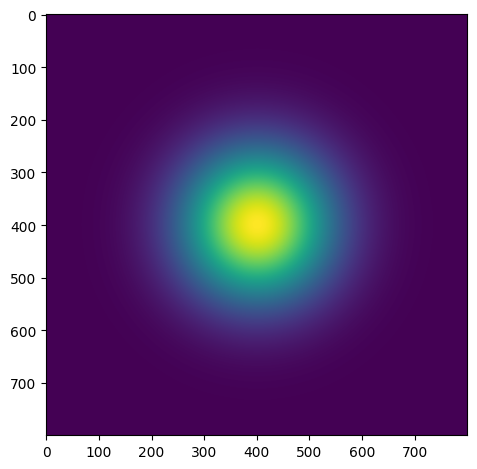

In [ ]:
# 1. Create a 2D grid of points from -4 to 4 with step 0.01
X, Y = np.mgrid[-4.0:4.0:0.01, -4.0:4.0:0.01]

# 2. Convert the NumPy arrays to PyTorch tensors
x = torch.Tensor(X)  # x-coordinates
y = torch.Tensor(Y)  # y-coordinates

# 3. Compute the 2D Gaussian function at each grid point
# Formula: z = exp(-(x^2 + y^2)/2)
z = torch.exp(-(x**2 + y**2) / 2.0)

# 4. Move the result back to CPU and convert to NumPy for plotting
z_np = z.cpu().numpy()

# 5. Plot the Gaussian as an image
plt.figure(figsize=(8, 8))
plt.imshow(z_np, extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
plt.colorbar(label='Gaussian Value')  # optional: show color scale
plt.title("2D Gaussian Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

Prompt: Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib

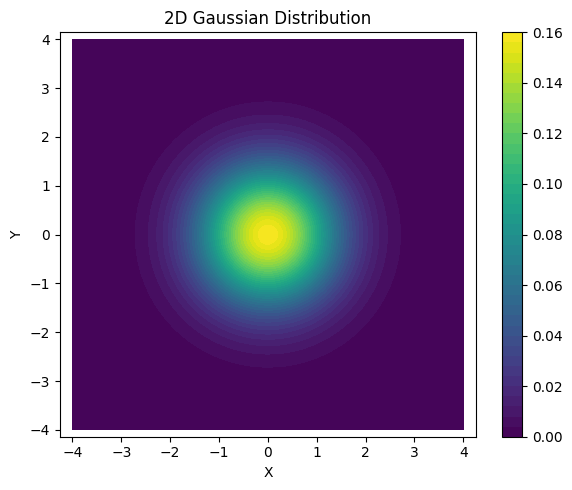

In [ ]:
# Define parameters for the 2D Gaussian
mu_x, mu_y = 0.0, 0.0          # Mean (center) of the Gaussian in x and y directions
sigma_x, sigma_y = 1.0, 1.0    # Standard deviation (spread) in x and y directions

# Create a 2D grid of coordinates
x = np.linspace(-4, 4, 100)    # 100 points evenly spaced from -4 to 4 along x-axis
y = np.linspace(-4, 4, 100)    # 100 points evenly spaced from -4 to 4 along y-axis
X, Y = np.meshgrid(x, y)       # Create 2D coordinate matrices for evaluation of the Gaussian

# Define the 2D Gaussian function
# Formula: Z(x, y) = (1/(2*pi*sigma_x*sigma_y)) * exp(-((x-mu_x)^2/(2*sigma_x^2) + (y-mu_y)^2/(2*sigma_y^2)))
# This computes the probability density at each (X, Y) point
Z = (1 / (2 * np.pi * sigma_x * sigma_y)) * np.exp(
    -(
        ((X - mu_x) ** 2) / (2 * sigma_x ** 2) +  # contribution from x-direction
        ((Y - mu_y) ** 2) / (2 * sigma_y ** 2)    # contribution from y-direction
    )
)

# 2D Gaussian Plot
plt.figure(figsize=(6, 5))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.tight_layout()
plt.show()

Prompt: Now that you have a Gaussian function generated by AI, use similar code to create a 2D sine func-
tion (i.e. a sune function from PyTorch whose angle is dependent on x and y coordinates of the pixels)
and another plot of the resulting Tensor that shows the ‘stripes’ of this function

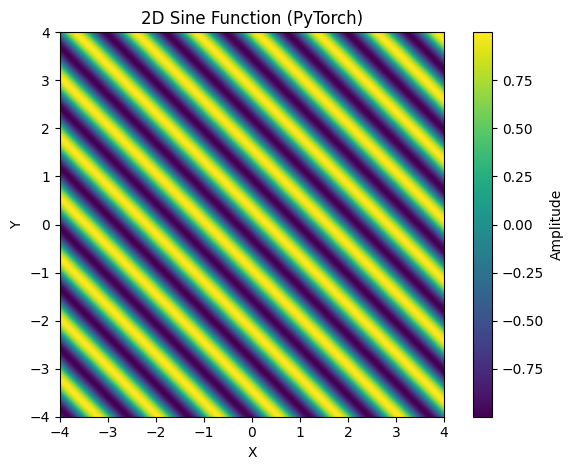

In [ ]:
# Generate a 2D coordinate grid using PyTorch
x = torch.linspace(-4, 4, 400)  # 400 points evenly spaced along x-axis from -4 to 4
y = torch.linspace(-4, 4, 400)  # 400 points evenly spaced along y-axis from -4 to 4
X, Y = torch.meshgrid(x, y, indexing='xy')  
# X and Y are 2D tensors representing the grid of coordinates
# 'indexing="xy"' ensures X corresponds to columns, Y to rows (like Cartesian coordinates)

# Define 2D sine function with spatial frequencies kx, ky
kx, ky = 5.0, 5.0  # Frequency multipliers along x and y directions
Z = torch.sin(kx * X + ky * Y)  
# Compute the sine function at each grid point
# The result Z is a 2D tensor of amplitudes for the combined spatial wave

# Plot using matplotlib (convert to numpy)
plt.imshow(Z.numpy(), extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
plt.title('2D Sine Function (PyTorch)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

Gabor Filter

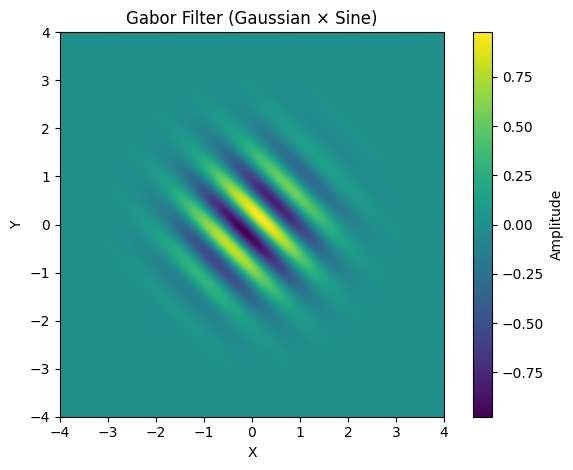

In [ ]:
# Parameters for Gaussian
sigma = 1.0  # Standard deviation of the Gaussian
gaussian = torch.exp(-(X**2 + Y**2) / (2 * sigma**2))  # Compute 2D Gaussian over grid

# Parameters for sine function
kx, ky = 5.0, 5.0  # Spatial frequencies along x and y
sine_wave = torch.sin(kx * X + ky * Y)  # Compute 2D sine wave over grid

# Element-wise multiplication (modulation)
gabor = gaussian * sine_wave  # Multiply Gaussian and sine to create Gabor filter

# Plot Gabor Filter
plt.imshow(gabor.numpy(), extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
plt.title('Gabor Filter (Gaussian × Sine)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

Gabor filter is like a stripe detector, only cares about particular angles, spacing and locations within the filtered section (the circle space in the middle). Application into feature extraction for detecting edges, textures and patterns in specific directions and scales

Task 2

/tmp/ipykernel_4249/213902109.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


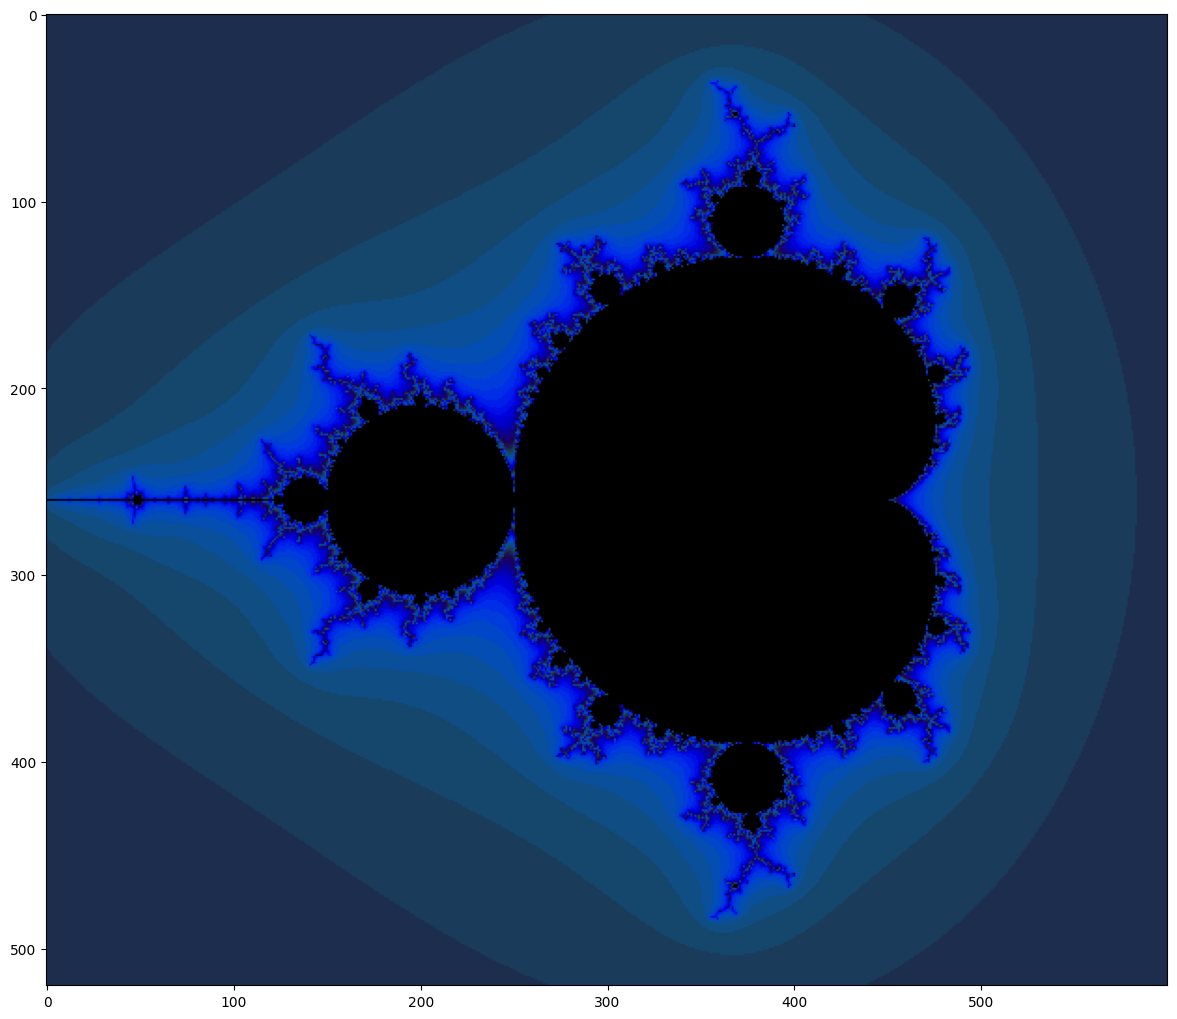

In [11]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005,-2:1:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs * zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """
    Display an array of iteration counts as a
    colorful picture of a fractal.
    """

    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

AI Mandelbrot set

Prompt: Generate the Mandelbrot set implemented in PyTorch and that runs on the GPU (i.e. seems to run fast and allows fast rendering)

Originally AI expected the code to be run on commandline, so it generated parameters like:
foo.py [-h] [--width WIDTH] [--height HEIGHT]
                            [--centre-x CENTRE_X] [--centre-y CENTRE_Y]
                            [--scale SCALE] [--max-iter MAX_ITER]
                            [--escape-radius ESCAPE_RADIUS] [--device DEVICE]
                            [--tile-size TILE_SIZE] [--gamma GAMMA]
                            [--outfile OUTFILE]

Prompt: I am running it in a jupyter notebook, can you adjust so i can just run it once

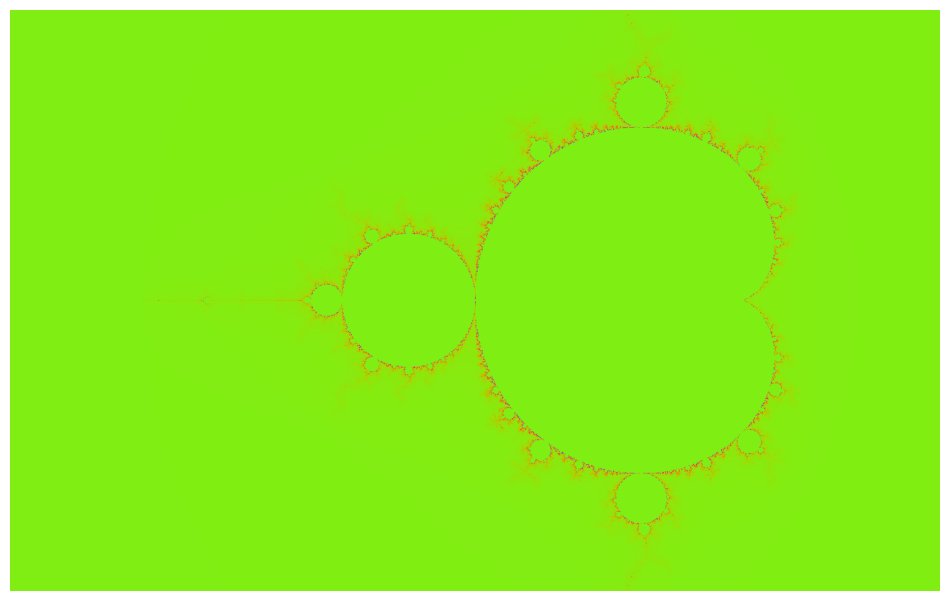

In [ ]:
@torch.no_grad()
def mandelbrot(width=1024, height=768, centre=(-0.75, 0.0), scale=3.5, max_iter=500, escape_radius=4.0):
    pixel_size = scale / width
    x_min = centre[0] - scale / 2.0
    y_min = centre[1] - (pixel_size * height) / 2.0

    xs = torch.linspace(x_min, x_min + pixel_size * (width - 1), width, device=device)
    ys = torch.linspace(y_min, y_min + pixel_size * (height - 1), height, device=device)

    X, Y = torch.meshgrid(xs, ys, indexing='xy')
    C = torch.complex(X, Y)
    Z = torch.zeros_like(C)

    counts = torch.zeros(C.shape, dtype=torch.int32, device=device)
    mask = torch.ones(C.shape, dtype=torch.bool, device=device)

    for i in range(1, max_iter + 1):
        Z[mask] = Z[mask] * Z[mask] + C[mask]
        mask_new = (Z.real * Z.real + Z.imag * Z.imag) <= escape_radius
        counts[mask & ~mask_new] = i
        mask = mask_new
        if not mask.any():
            break
    counts[mask] = max_iter
    return counts

def colourise(counts, max_iter=500):
    palette_size = 256
    t = (counts.float() / max_iter).clamp(0, 1)
    r = 0.5 + 0.5 * torch.sin(6.28318 * (t + 0.0))
    g = 0.5 + 0.5 * torch.sin(6.28318 * (t + 0.33))
    b = 0.5 + 0.5 * torch.sin(6.28318 * (t + 0.66))
    img = torch.stack([r, g, b], dim=-1)
    return (img * 255).byte().cpu().numpy()

# Parameters
width, height = 1600, 1000
centre_x, centre_y = -0.75, 0.0
scale = 3.5
max_iter = 1000

counts = mandelbrot(width, height, (centre_x, centre_y), scale, max_iter)
img = colourise(counts, max_iter)

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


Prompt: I want to change the colour, give me a function called colourise() to a better colour palette for the eyes

In [ ]:
def colourise(counts, max_iter=1000):
    """
    Map set iteration counts to RGB colours.
    
    Args:
        counts: tensor of iteration counts
        max_iter: maximum iterations used (for normalisation)
        
    Returns:
        img: numpy array of shape (height, width, 3) with RGB values
    """
    # Normalise counts to [0,1] range
    t = (counts.float() / max_iter).clamp(0, 1)
    # Generate red channel: oscillates based on normalised iteration
    r = torch.clamp(1.5 - torch.abs(4 * t - 1.0), 0, 1)
    # Generate green channel: phase-shifted relative to red
    g = torch.clamp(1.5 - torch.abs(4 * t - 2.0), 0, 1)
    # Generate blue channel: further phase-shifted
    b = torch.clamp(1.5 - torch.abs(4 * t - 3.0), 0, 1)
    # Combine channels into an RGB image
    img = torch.stack([r, g, b], dim=-1)
    # Convert to 8-bit integers for plotting and move to CPU as NumPy array
    return (img * 255).byte().cpu().numpy()

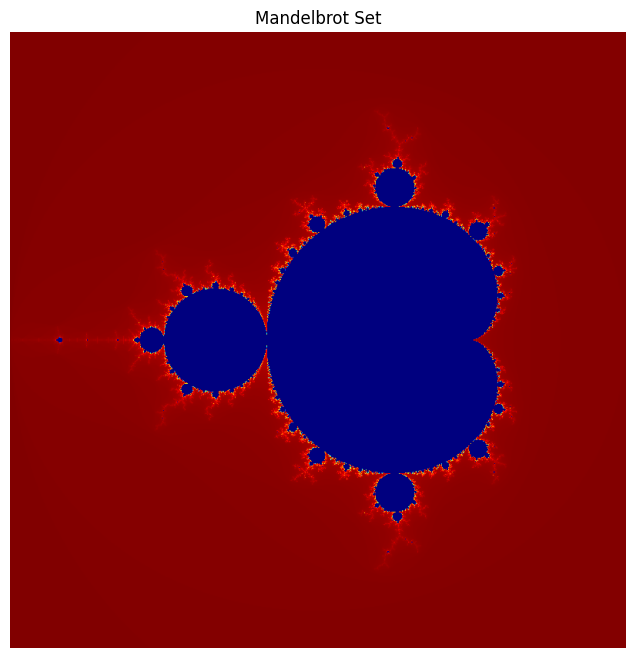

In [ ]:
@torch.no_grad()
# disabling torch gradients because we don't need it.
# not training NN so gradients are not required for this task
# reduces memory usage and speeds up computations
def mandelbrot_res(x_min, x_max, y_min, y_max, width=1600, height=1000, max_iter=1000, escape_radius=4.0):
    """
    Compute Mandelbrot set escape iteration counts for a grid of complex numbers.
    
    Args:
        x_min, x_max: float, bounds of the real axis
        y_min, y_max: float, bounds of the imaginary axis
        width, height: int, resolution of the output image
        max_iter: int, maximum number of iterations to check for escape
        escape_radius: float, squared magnitude threshold for escape
        
    Returns:
        counts: tensor of shape (height, width) containing iteration counts until escape
    """
    # this function computes how many iterations it takes for each point in a complex plane to "escape" the Mandelbrot set.

    # Create 1D arrays of evenly spaced real and imaginary coordinates
    xs = torch.linspace(x_min, x_max, width, device=device)  # Real axis values
    ys = torch.linspace(y_min, y_max, height, device=device)  # Imaginary axis values

    # torch.meshgrid combines these 1D arrays into 2D grids (X and Y) representing coordinates for all pixels.
    X, Y = torch.meshgrid(xs, ys, indexing='xy')

    # Assigns each pixel a complex number corresponding to its position on the plane.
    # Each pixel will be iterated individually using the Mandelbrot formula.
    C = torch.complex(X, Y)

    # Initialise Z as 0 for all pixels; Mandelbrot iteration starts with Z_0 = 0
    Z = torch.zeros_like(C)

    # Tensor to store number of iterations until escape for each pixel
    counts = torch.zeros(C.shape, dtype=torch.int32, device=device)

    # Boolean mask indicating pixels still being iterated (not escaped yet)
    mask = torch.ones(C.shape, dtype=torch.bool, device=device)

    # Iteratively apply Mandelbrot formula: Z = Z^2 + C
    for i in range(1, max_iter + 1):
        # Only update pixels that have not yet escaped
        Z[mask] = Z[mask] * Z[mask] + C[mask]

        # Determine which pixels are still within the escape radius
        mask_new = (Z.real * Z.real + Z.imag * Z.imag) <= escape_radius

        # For pixels that just escaped this iteration, record the iteration number.
        counts[mask & ~mask_new] = i

        # Update mask for the next iteration
        mask = mask_new

        # Early exit: if all points have escaped, stop iterating to save computation
        if not mask.any():
            break

    # Assign max iteration count to points that never escaped (belong to the Mandelbrot set)
    counts[mask] = max_iter

    return counts  # Return the iteration count grid

# Parameters for default Mandelbrot; shows the iconic “main cardioid and bulbs” of the Mandelbrot.
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
width, height = 800, 800
max_iter = 500

# Compute Mandelbrot set
counts = mandelbrot_res(x_min, x_max, y_min, y_max, width, height, max_iter)

# Convert to RGB image
img = colourise(counts, max_iter)

# Display
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Mandelbrot Set")
plt.show()

2.3 Demo

Mini Brot: Found coords on https://mandelbrot.site/ and then zoomed in

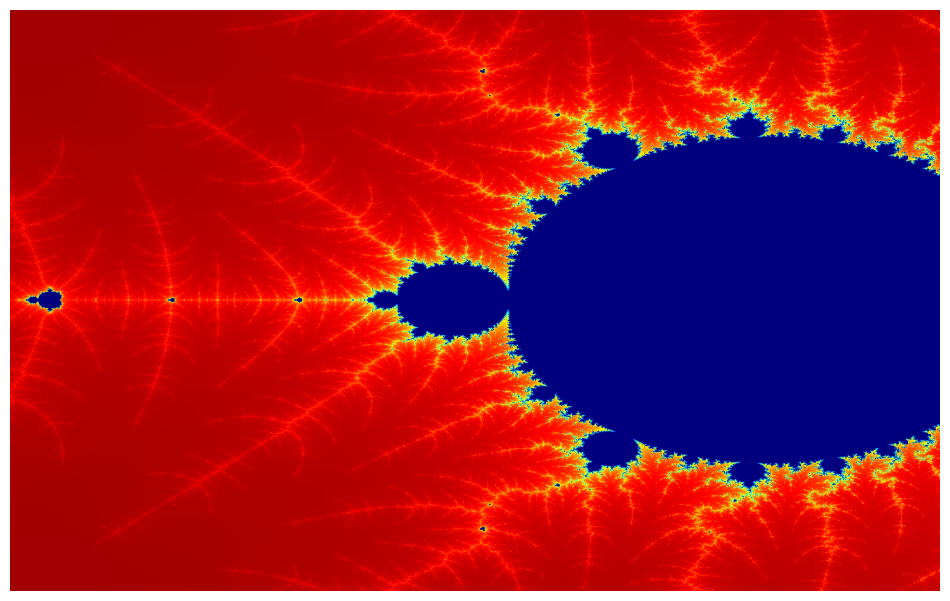

In [33]:
x_min, x_max = -1.405, -1.395  # Real axis bounds for the zoomed region
y_min, y_max = -0.005, 0.005  # Imaginary axis bounds for the zoomed region
width, height = 1600, 1000  # Resolution of the output image
max_iter = 1000  # Maximum iterations to determine escape

# Compute Mandelbrot escape counts for the specified region
counts = mandelbrot_res(x_min, x_max, y_min, y_max, width, height, max_iter)

# Convert iteration counts to RGB colours (function defined elsewhere)
img = colourise(counts, max_iter)

# Display the resulting Mandelbrot image
plt.figure(figsize=(12, 8))  # Figure size in inches
plt.imshow(img)  # Display the RGB image
plt.axis('off')  # Hide axes for a clean image
plt.show()  # Render the plot


Julia Set

Prompt: From the mandelbrot code, recreate it so that it works for julia set. Also comment on the new sections of the code why it differs from Mandelbrot's code

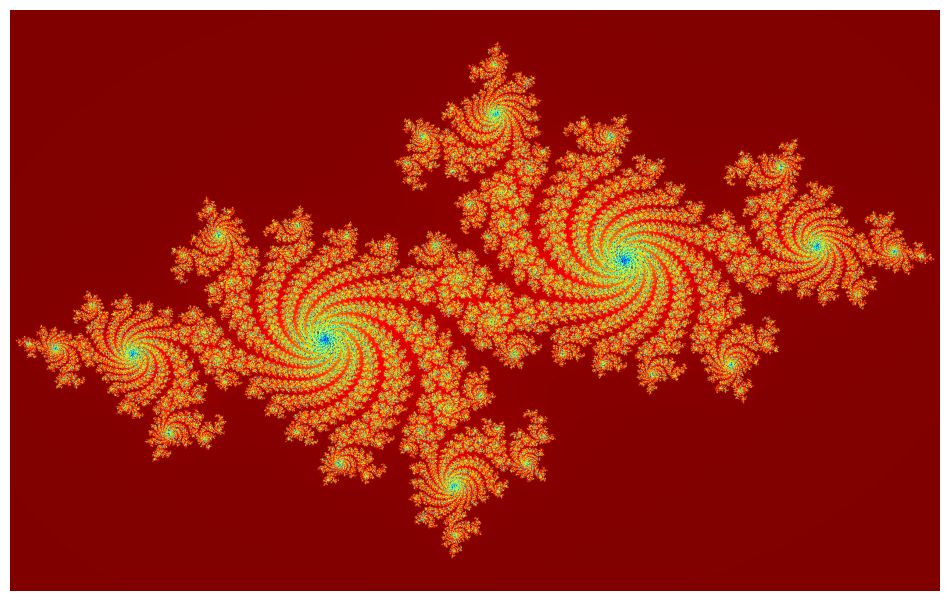

In [28]:
@torch.no_grad()
def julia_res(x_min, x_max, y_min, y_max, width=1600, height=1000, max_iter=1000, escape_radius=4.0, C=complex(-0.7, 0.27015)):
    """
    Compute Julia set escape iteration counts for a grid of complex numbers.
    Significant differences from Mandelbrot are explained in-line.
    """
    
    xs = torch.linspace(x_min, x_max, width, device=device)
    ys = torch.linspace(y_min, y_max, height, device=device)
    X, Y = torch.meshgrid(xs, ys, indexing='xy')
    
    Z = torch.complex(X, Y)  
    # Unlike Mandelbrot where Z0 = 0 for all pixels, here Z0 = pixel coordinates (x + iy)
    # Each pixel represents a different starting point in the complex plane
    
    C = torch.full_like(Z, complex(C.real, C.imag))  
    # Unlike Mandelbrot where C varies per pixel, here C is fixed across the grid
    # This single constant defines the Julia set shape for the whole image
    
    counts = torch.zeros(Z.shape, dtype=torch.int32, device=device)
    mask = torch.ones(Z.shape, dtype=torch.bool, device=device)
    
    for i in range(1, max_iter + 1):
        Z[mask] = Z[mask] * Z[mask] + C[mask]  
        # Apply iteration formula only on pixels that haven't escaped
        # Formula is identical to Mandelbrot, but Z0 varies and C is fixed
        
        mask_new = (Z.real * Z.real + Z.imag * Z.imag) <= escape_radius
        counts[mask & ~mask_new] = i
        mask = mask_new
        if not mask.any():
            break
    
    counts[mask] = max_iter
    return counts

x_min, x_max = -1.5, 1.5
y_min, y_max = -1.0, 1.0
width, height = 1600, 1000
max_iter = 1000
C = complex(-0.7, 0.27015)  # Julia constant; changing this generates different Julia shapes

counts = julia_res(x_min, x_max, y_min, y_max, width, height, max_iter, C=C)
img = colourise(counts, max_iter)

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

Part 3

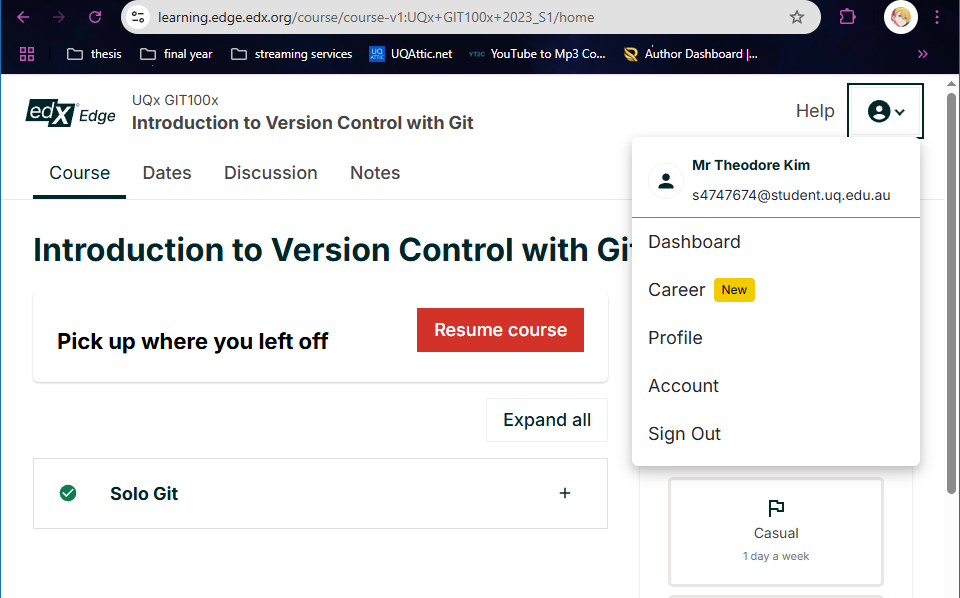

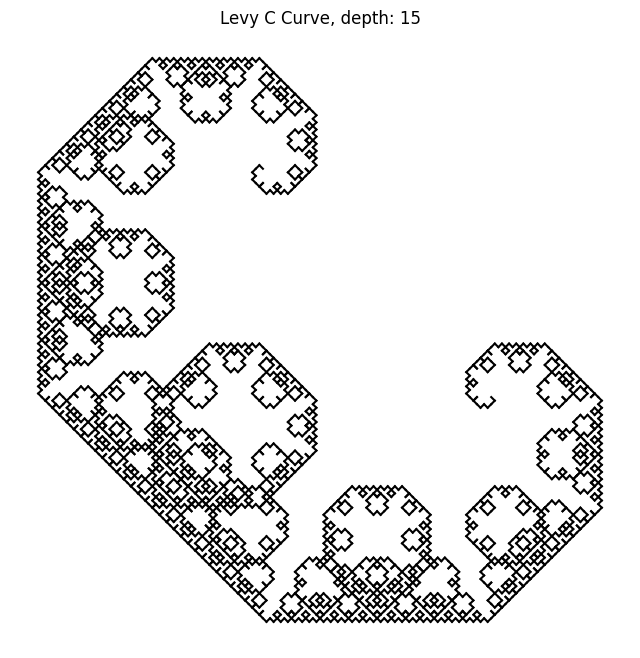

In [ ]:
# Recursion Classic Levy C Curve
def levy_c_curve(start, end, depth):
    if depth == 0:
        return torch.stack([start, end], dim=0)
    """
    Setting up the base case for this recursion. 
    When depth == 0 then function returns 
    start and end points stacked into a single tensor.

    torch.stack used here to create 2x2 tensor from start and end points, 
    allowing all the previous operations before base case to remain 
    in tensor form, NOT python lists 
    """
    
    vec = end - start
    # computes the displacement vector between the start and end points.

    # simple vector subtraction performed on the GPU if exists; end - start

    rotation = torch.tensor([[0.5, -0.5], [0.5, 0.5]], device=device)
    # 2x2 tensor representing linear transformation,
    # rotates and scales vector by 45 degrees.

    # rotation tensor is created directly on GPU,
    # avoids unnecessary CPU to GPU transfers.

    mid = start + vec @ rotation.T
    # vec @ rotation.T uses PyTorch's matrix multiplation "@"
    # rotation is applied to vec

    # adding the rotated vector to 'start' gives the midpoint 
    # for the recursion, which is where the curve will 'bend'
    
    left = levy_c_curve(start, mid, depth-1)
    right = levy_c_curve(mid, end, depth-1)
    # recursion splits the line segment into left (start -> mid)
    # and right (mid -> end)
    
    # each segment recursively processed until depth = 0, building the fractal structure
    return torch.cat([left[:-1], right], dim=0)
    # torch.cat([left[:-1], right], dim=0) concatenates the left and right segment points
    # removes duplicated middle point [left[:-1] from the calculated left tensor
    # the whole fractal is stored in PyTorch tensors 

# Fractal Generation
p0 = torch.tensor([0.0, 0.0], device=device)
p1 = torch.tensor([1.0, 0.0], device=device)
# p0 and p1 are the 'start' and 'end' points of the initial line segment.
# when specifying 'device', the tensor is created on the CPU or GPU as specified,
# we want GPU if possible.

depth = 15
# how many recursive splits occur
# larger depth increases detail but also num of points exponentially

points = levy_c_curve(p0, p1, depth).cpu().numpy()
# calling levy_c_curve() returns tensor, which PyTorch computed all calculations for all curve points
# converting data and moving to CPU as a numpy so we can plot

# plotting
plt.figure(figsize=(8, 8))
for i in range(n_points-1):
    plt.plot(points[i:i+2,0], points[i:i+2,1], color = 'black')
plt.axis('equal')
plt.axis('off')
plt.title(f"Levy C Curve, depth: {depth}")
plt.show()

### Key Torch Advantages in This Implementation

**Vectorised Midpoint Calculation:**
mid = start + vec @ rotation.T allows batched linear transformations if extended to multiple segments in parallel.

**Recursive Tensor Operations:**
By keeping torch.stack and torch.cat throughout, all intermediate points remain on GPU, avoiding costly CPU-GPU transfers until plotting.

**Device Flexibility:**
device=device ensures that the fractal generation can run on GPU for acceleration or CPU if GPU unavailable.

**Memory Efficiency:**
Only essential tensors are created per recursion, with redundant points eliminated by slicing (left[:-1]).

Issue with first code: Not Parallelism, although all computations are on GPU and can argue that its still parallelism, recursion itself relies on left() and right() which waits for its next output recursively until base case, and still becomes sequential.

The recursion calls left before right, and each recursive call waits for its children to finish.

There is no batching; each segment is processed sequentially, which prevents true parallelism even if each operation internally uses PyTorch tensors.

Prompt:
showing the resulting fractal code and its output to the demonstrator and justifying that it uses PyTorch/TF in a major component within the algorithm of the fractal utilising parallelism with PyTorch/TF in a reasonable way (3 Marks) we have to show parallelism.

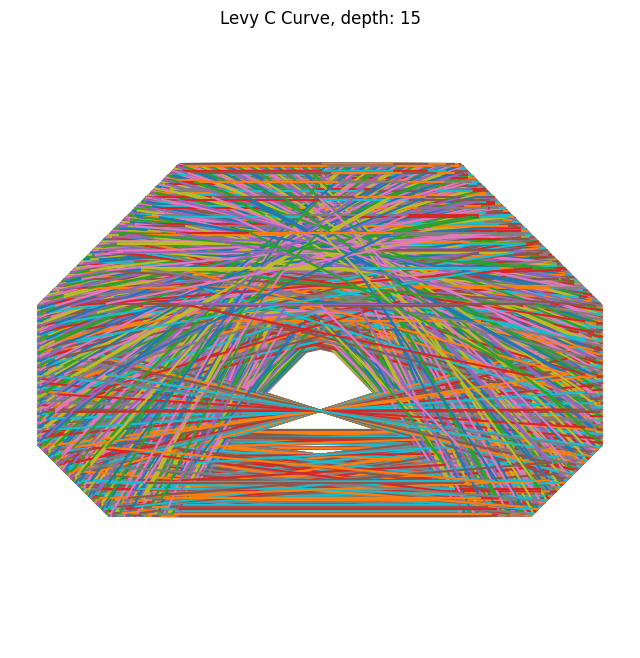

In [25]:
# Parallel Version

def levy_c_curve_parallel(start, end, depth):
    """
    Generate Levy C curve points in parallel using PyTorch tensors.
    Unlike the recursive version, this version updates all segments
    simultaneously using vectorised tensor operations.
    """

    # Initialise with a single segment from start to end
    segments = torch.stack([start, end], dim=0).unsqueeze(0)
    # torch.stack([start, end], dim=0) -> shape (2,2)
    # unsqueeze(0) -> adds batch dimension -> shape (1,2,2)
    # This allows batched operations on multiple segments in parallel

    # Rotation matrix for the Levy C curve (rotates vector by 45 degrees and scales)
    rotation = torch.tensor([[0.5, -0.5],
                             [0.5,  0.5]], device=device)
    # Created directly on GPU if available to avoid CPU/GPU transfers

    # Iteratively refine curve for 'depth' levels
    for _ in range(depth):
        # Extract start and end points for all current segments
        start_pts = segments[:, 0, :]  # shape (n_segments, 2)
        end_pts   = segments[:, 1, :]  # shape (n_segments, 2)
        # Both tensors remain on GPU if device='cuda', enabling parallel computation

        # Compute displacement vectors for all segments in parallel
        vec = end_pts - start_pts
        # Simple element-wise subtraction applied to all segments at once

        # Apply rotation to all vectors using batched matrix multiplication
        mid_pts = start_pts + vec @ rotation.T
        # vec @ rotation.T uses PyTorch's efficient matrix multiplication
        # All segments are rotated simultaneously on GPU if available

        # Split each segment into left and right halves
        left  = torch.stack([start_pts, mid_pts], dim=1)  # shape (n_segments, 2, 2)
        right = torch.stack([mid_pts, end_pts], dim=1)    # shape (n_segments, 2, 2)

        # Combine all new segments into one tensor for next iteration
        segments = torch.cat([left, right], dim=0)
        # This doubles the number of segments each iteration
        # No Python loops over segments -> fully parallel

    # Flatten all segments into a continuous curve
    points = segments[:, 0, :]  # take first point of each segment
    points = torch.cat([points, segments[-1:, 1, :]], dim=0)
    # Add the last point of the last segment to complete the curve

    return points

p0 = torch.tensor([0.0, 0.0], device=device)
p1 = torch.tensor([1.0, 0.0], device=device)
# Start and end points of initial line segment
# Created directly on GPU if available

depth = 15
# Number of iterations to refine the curve
# Higher depth → more points and more detail

# generating points in parallel
points = levy_c_curve_parallel(p0, p1, depth).cpu().numpy()
# PyTorch computes all segment midpoints in parallel on GPU
# .cpu().numpy() converts tensor to NumPy array for plotting

n_points = points.shape[0]
# .shape[0] gives num of points along the levy c curve

# plotting
plt.figure(figsize=(8, 8))
for i in range(n_points-1):
    # Plot each line segment
    plt.plot(points[i:i+2, 0], points[i:i+2, 1])
plt.axis('equal')
plt.axis('off')
plt.title(f"Levy C Curve, depth: {depth}")
plt.show()


### Why the simple parallel approach fails

When you just batch all segments and double them at each depth:

segments = torch.cat([left, right], dim=0)


The order of points along the curve is lost.

Flattening with segments[:,0,:] + last point gives “jumping lines”, even though all computations are in parallel.

So parallelism alone doesn’t guarantee a smooth curve, order matters.

### Conclusion
If you want the “classic” smooth Levy C curve: recursion is required. Full parallelism cannot preserve the exact recursive path.

If you want GPU parallelism: you can batch operations, but some zigzagging is inevitable.

Trade-off: visual correctness vs. parallel performance.